<br><font face="Times New Roman" size=5><div dir=ltr align=center>
<font color=blue size=8>
    Introduction to Machine Learning <br>
<font color=red size=5>
    Sharif University of Technology - Computer Engineering Department <br>
    Fall 2022<br> <br>
<font color=black size=6>
    Homework 2: Practical - Linear Regression
    </div>
<br><br>
<font size=4>
   **Name**: Yalda Shabanzadeh<br>
   **Student ID**: 98101822<br> <br>

<font face="Times New Roman" size=4><div dir=ltr>
# Problem 1: Linear Regression Model (40 + 30 optional points)
According to <a href="https://github.com/asharifiz/Introduction_to_Machine_Learning/blob/main/Jupyter_Notebooks/Chapter_02_Classical_Models/Linear%20regression.ipynb"><font face="Roboto">Linear Regression Notebook</font></a>, train a linear regression model on an arbitrary dataset. Explain your chosen dataset and split your data into train and test sets, then predict values for the test set using your trained model. Try to find the best hyperparameters for your model. (Using Lasso Regression, Ridge Regression or Elastic Net and comparing them will have extra optional points)
<br> Explain each step of your workflow.

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Libraries

In this part, we install and import essential libraries for implementing linear regression from scratch.

In [3]:
# !pip install scikit-learn
# !pip install seaborn

In [4]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Dataset

The Housing dataset which contains information about different houses in Boston. This data was originally a part of UCI Machine Learning Repository and has been removed now. We can also access this data from the scikit-learn library. There are 506 samples and 13 feature variables in this dataset. The objective is to predict the value of prices of the house using the given features.

In [411]:
from sklearn.datasets import load_boston


boston_dataset = load_boston()

In [412]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [413]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [415]:
boston['MEDV'] = boston_dataset.target

In [416]:
boston.isnull().sum()

CRIM           0
ZN             0
INDUS          0
CHAS           0
NOX            0
RM             0
AGE            0
DIS            0
RAD            0
TAX            0
PTRATIO        0
B              0
LSTAT          0
progression    0
MEDV           0
dtype: int64

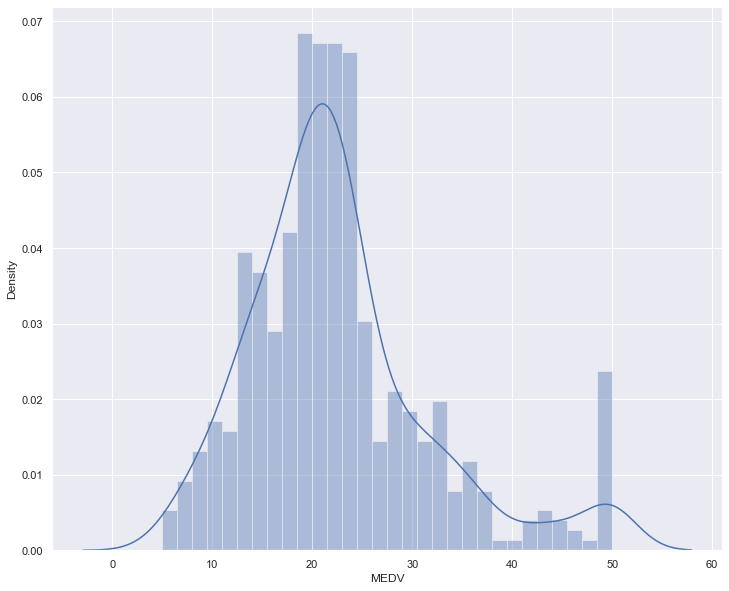

In [417]:
sns.set(rc={'figure.figsize':(12, 10)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

<AxesSubplot:>

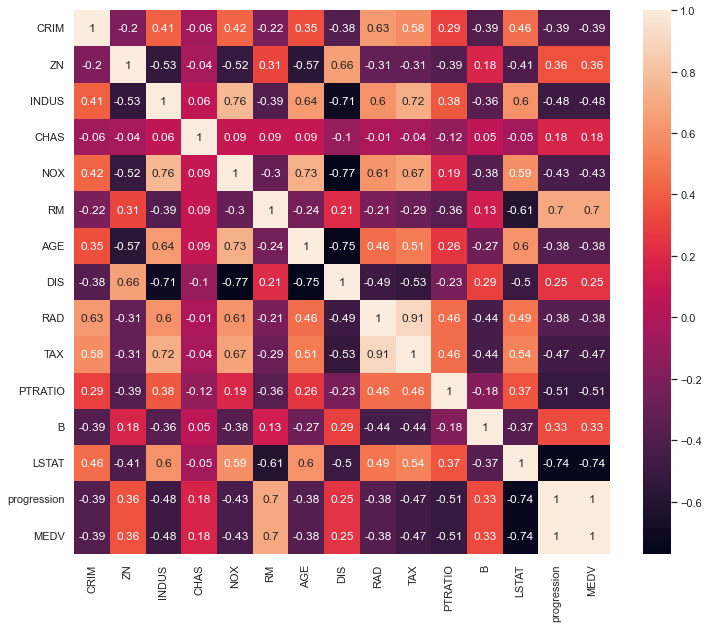

In [418]:
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [419]:
def multiple_plot(df, y, features, n_row=3, n_col=4):
    """
    Helper function to plot multiple plots
    """
    assert len(features) <= n_row * n_col
    plt.figure(figsize=(3 * n_col, 5 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        if i >= len(features):
            return
        col = features[i]
        x = df[col]
        plt.subplot(n_row, n_col, i + 1)
        plt.scatter(x, y, marker='o')
        plt.title(col)
        plt.xlabel(col)
        plt.ylabel('MEDV')
        plt.xticks(())
        plt.yticks(())

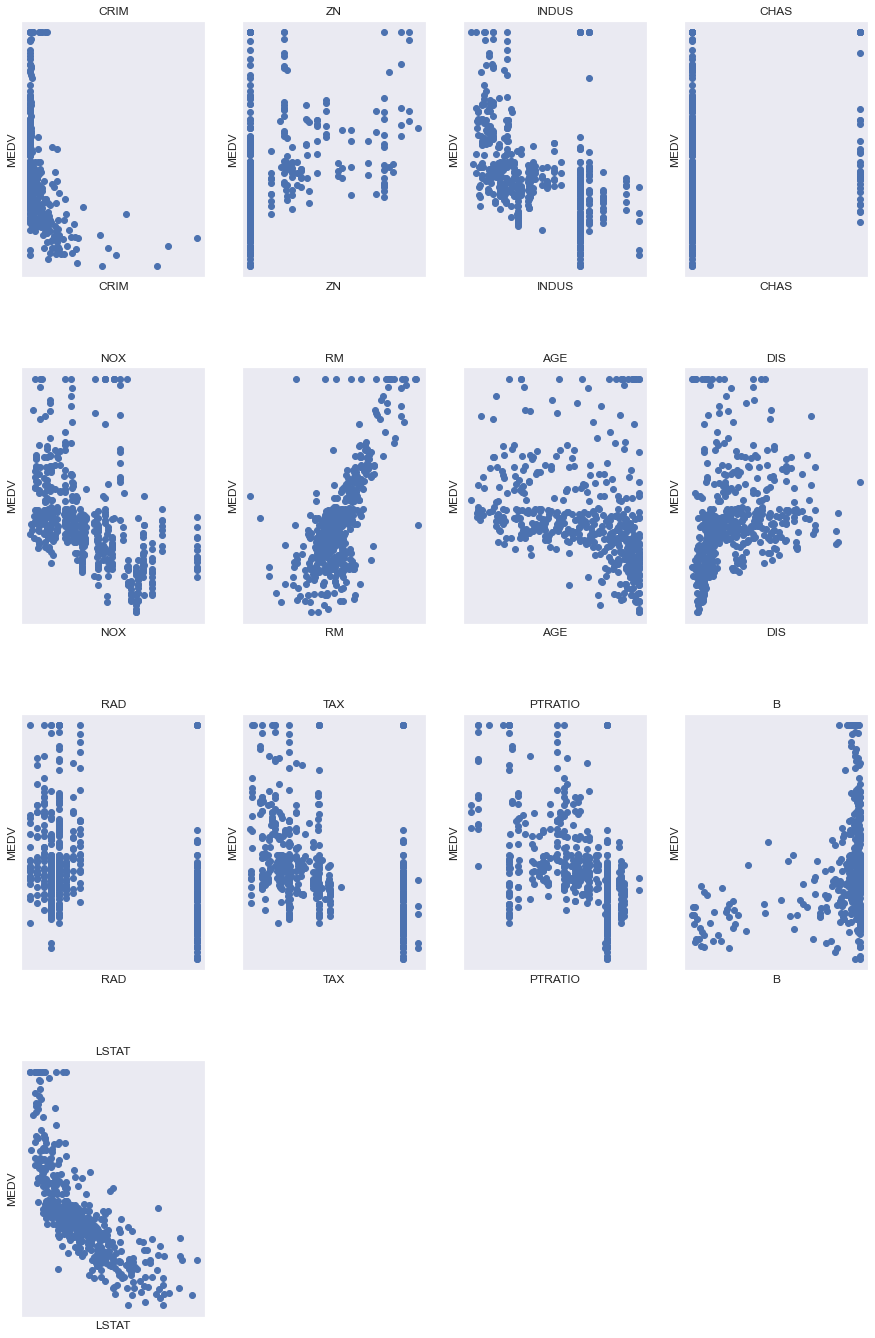

In [420]:
feature_names = boston_dataset.feature_names
target = boston['MEDV']

multiple_plot(boston, target, feature_names, 4, 4)

To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74).

In [436]:
# features = ['LSTAT','RM', 'ZN', 'PTRATIO']
# X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM'], boston['ZN'], boston['PTRATIO']], columns=features)

X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns=['LSTAT','RM'])
y = boston['MEDV']

In [422]:
X.head()

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147


In [423]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


## Regularization

In this part, some regularizations are implemented which are used in different regressoins.

In [424]:
class L1Regularization:
    """
    Regularization for Lasson Regression
    """
    def __init__(self, lamda):
        self.lamda = lamda

    def __call__(self, weights):
        return self.lamda * np.sum(np.abs(weights))
    
    def derivation(self, weights):
        return self.lamda * np.sign(weights)


class L2Regularization:
    """
    Regularization used for Ridge Regression
    """
    def __init__(self, lamda):
        self.lamda = lamda

    def __call__(self, weights):
        return self.lamda * np.sum(np.square(weights))
    
    def derivation(self, weights):
        return self.lamda * 2 * (weights)


class ElasticRegularization:
    """
    Regularization used for ElasticNet
    """
    def __init__(self, lamda=0.1, l_ratio=0.5):
        self.lamda = lamda
        self.l_ratio = l_ratio

    def __call__(self, weights):
        l1_contribution = self.l_ratio * self.lamda * np.sum(np.abs(weights))
        l2_contribution = (1 - self.l_ratio) * self.lamda * 0.5 * np.sum(np.square(weights))
        return (l1_contribution + l2_contribution)

    def derivation(self, weights):
        l1_derivation = self.lamda * self.l_ratio * np.sign(weights)
        l2_derivation = self.lamda * (1 - self.l_ratio) * weights
        return (l1_derivation + l2_derivation)

## Regressions

In this part, `Regression` class is implemented. It predicts based on the regularization method and gradient descent.

The `LinearRegression` class does not have any regularization method.
The `LassoRegression` class have l1 regularization method.
The `RidgeRegression` class have l2 regularization method.
The `ElasticNetRegression` class have elastic regularization method.

In [425]:
class Regression:
    """
    Regression with Gradient Descent
    """
    
    def __init__(self, lr=1e-3, n_iter=1000, regularization=None):
        self.lr = lr
        self.n_iter = n_iter
        self.regularization = regularization
        self.costs = list()
        self.weights = None
        self.bias = None
    
    def _clear(self):
        self.costs = list()
    
    def _init_params(self, n: int):
        self.weights = np.zeros((n, 1))
        self.bias = 0
    
    def _update_params(self, dw, db):
        self.weights -= self.lr * dw
        self.bias -= self.lr * db
    
    def _update_costs(self, cost):
        self.costs.append(cost)
    
    def _get_prediction(self, X):
        return np.dot(X, self.weights) + self.bias
    
    def _get_cost(self, y, y_pred, m):
        error = y - y_pred
        if self.regularization:
            return (1 / (2 * m)) * np.sum(np.square(error)) \
                    + self.regularization(self.weights)
        return (1 / (2 * m)) * np.sum(np.square(error))
    
    def _get_gradients(self, X, y, y_pred):
        m, n = X.shape
        error = y_pred - y
        if self.regularization:
            dw = (1 / m) * np.dot(X.T, error) + self.regularization.derivation(self.weights)
        else:
            dw = (1 / m) * np.dot(X.T, error)
        db = -(2 / m) * np.sum(error)
        return dw, db
        
    def fit(self, X, y):
        """Fit the training data
        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Training samples
        y : array-like, shape = [n_samples, n_target_values]
            Target values
        Returns
        -------
        self : object
        """

        m, n = X.shape
        self._clear()
        self._init_params(n)
        y = np.array(y).reshape(-1, 1)

        for i in range(self.n_iter):
            y_pred = self._get_prediction(X)
#             assert np.any(np.isnan(y_pred)) == False
#             if np.any(np.isnan(y_pred)):
#                 print(i)
            cost = self._get_cost(y, y_pred, m)
            dw, db = self._get_gradients(X, y, y_pred)
            self._update_params(dw, db)
            self._update_costs(cost)

        return self
    
    def predict(self, X):
        """ Predicts the value after the model has been trained.
        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Test samples
        Returns
        -------
        Predicted value
        """
        y_pred = self._get_prediction(X)
        return y_pred

In [426]:
class LinearRegression(Regression):
    def __init__(self, **kwargs):
        super().__init__(regularization=None, **kwargs)

In [427]:
class LassoRegression(Regression):
    def __init__(self, lamda, **kwargs):
        self.regularization = L1Regularization(lamda)
        super().__init__(regularization=self.regularization, **kwargs)

In [428]:
class RidgeRegression(Regression):
    def __init__(self, lamda, **kwargs):
        self.regularization = L2Regularization(lamda)
        super().__init__(regularization=self.regularization, **kwargs)

In [429]:
class ElasticNetRegression(Regression):
    def __init__(self, lamda, l_ratio, **kwargs):
        self.regularization = ElasticRegularization(lamda, l_ratio)
        super().__init__(regularization=self.regularization, **kwargs)

In [440]:
kwargs = dict(
    n_iter=3000, lr=1e-3
)

lin_model = LinearRegression(**kwargs)
lin_model.fit(X_train, y_train)

In [441]:
lasso_model = LassoRegression(lamda=0.3, **kwargs)
lasso_model.fit(X_train, y_train)

In [442]:
ridge_model = RidgeRegression(lamda=0.3, **kwargs)
ridge_model.fit(X_train, y_train)

In [443]:
elastic_model = ElasticNetRegression(lamda=0.3, l_ratio=0.9, **kwargs)
elastic_model.fit(X_train, y_train)

In [444]:
from sklearn.metrics import r2_score, mean_squared_error


def rmse_score(y_train, y_train_predict):
    return np.sqrt(mean_squared_error(y_train, y_train_predict))


def predict_train_test(model, X_train, y_train, X_test, y_test):
    y_train_predict = model.predict(X_train)
    rmse = rmse_score(y_train, y_train_predict)
    r2 = r2_score(y_train, y_train_predict)

    print("The model performance for training set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))

    y_test_predict = model.predict(X_test)
    rmse = rmse_score(y_test, y_test_predict)
    r2 = r2_score(y_test, y_test_predict)

    print("The model performance for testing set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))

In [445]:
predict_train_test(lin_model, X_train, y_train, X_test, y_test)

The model performance for training set
--------------------------------------
RMSE is 5.647575936174035
R2 score is 0.6287021693582684
The model performance for testing set
--------------------------------------
RMSE is 5.044787203767662
R2 score is 0.6749441769520614


In [446]:
predict_train_test(lasso_model, X_train, y_train, X_test, y_test)

The model performance for training set
--------------------------------------
RMSE is 5.650142407550941
R2 score is 0.6283646292214033
The model performance for testing set
--------------------------------------
RMSE is 5.010341639107495
R2 score is 0.6793679536341344


In [447]:
predict_train_test(ridge_model, X_train, y_train, X_test, y_test)

The model performance for training set
--------------------------------------
RMSE is 5.747025958008581
R2 score is 0.6155104229868269
The model performance for testing set
--------------------------------------
RMSE is 4.865337772390754
R2 score is 0.697658168753402


In [448]:
predict_train_test(elastic_model, X_train, y_train, X_test, y_test)

The model performance for training set
--------------------------------------
RMSE is 5.651587996935904
R2 score is 0.6281744390160025
The model performance for testing set
--------------------------------------
RMSE is 5.0011645821883635
R2 score is 0.680541432017046


**R2 score:** ridge > elastic > lasso > linear

**RMSE:** ridge < elastic < lasso < linear

## Compare
### ElasticNet

In this section, we compare elastic net results for with different `l_ratio`.

In [449]:
def mse_loss(pred, real):
    diff = pred - real
    return np.sum(diff * diff) / diff.size

In [450]:
losses = []
for i in range(11):
    params = {
        "l_ratio" : i * 0.1,
        "lamda" : 0.3,
        "lr" : 0.001,
        "n_iter" : 3000
    }
    model = ElasticNetRegression(**params)
    model.fit(X, y) 
    y_pred = model.predict(X)
    losses.append(mse_loss(y_pred.squeeze(), y.squeeze()))

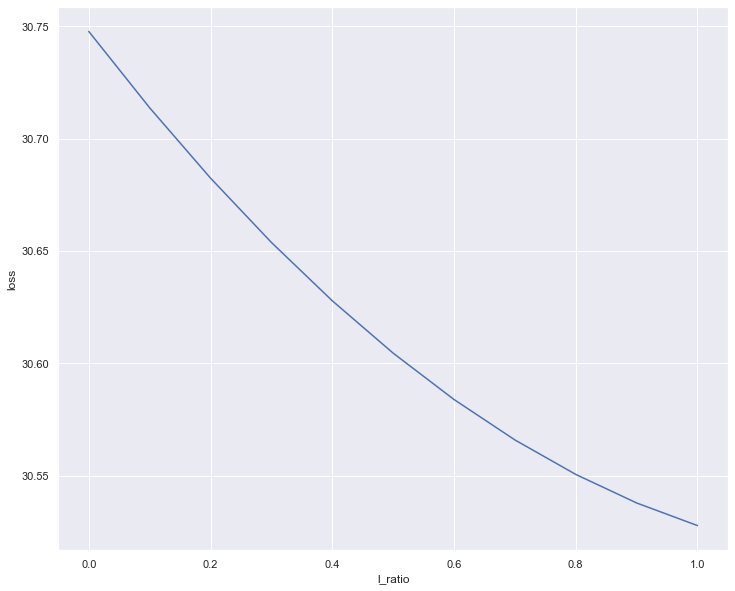

In [451]:
plt.plot([i * 0.1 for i in range(11)], losses)
plt.xlabel('l_ratio')
plt.ylabel('loss')
plt.show()